# Perspective Projection of 3D Human Mesh for Egocentric Applications


>Authors:
>- Matteo Bordignon,
>- Marco Wang,
>- Cristian Murtas

>A project developed for the Computer Vision course held by the professor Nicola Conci at University of Trento

## Assignement
Develop a program that given a human 3D mesh, extracts 3D coordinates from the scene, applies perspective projection of the previously extracted points onto the image plain of the camera in order to highlight the pose of the mesh.

## Projection
Projection is the fundamental process of mapping 3D points, including time, to 2D points.
When projecting a 3D point onto the image plane, a line is defined between the point and the center of projection. The intersection of this line with the image plane yields the 2D projection of the 3D point.
This process forms the basis of how 3D scenes are represented in 2D images.

$f: \mathbb{R}^4 \to \mathbb{R}^3$

$f(X,Y,Z,t)\to (x,y,t)$

### Perspective Projection
Perspective projection is a technique used in computer graphics, computer vision, and 3D rendering to simulate how objects appear to the human eye when viewed in three-dimensional space. It projects points from a 3D world onto a 2D plane, maintaining realistic depth perception and visual proportions.

Given a 3D point $P(X,Y,Z)$ in camera coordinates, its corresponding 2D point on the image plane $P(x', y')$ can be computed using the following equations:

$x' = \frac{fX}{Z}, \ y'=\frac{fY}{Z}$

where $f$ is the focal length of the camera and $Z$ is the depth of the point (distance from the camera along the $z$-axis)


## Implementation
### Tool used
We decided to use python as scripting language and Blender as render engine because of its lightness, semplicity and API.

### First Step: Set up the environment
The first thing we did was import the mesh in blender and position it at the origin of the scene.

In [ ]:
import bpy
        
# Import the FBX file
bpy.ops.import_scene.fbx(filepath=fbx_file_path)

# Move the armature to the origin
armature.location = (0, 0, 0)
bpy.context.view_layer.update()

Then we added a camera to the scene and positioned at the top of the mesh, we added a small rotation to the camera in order to frame all the mesh.

In [ ]:
# Add a camera object
camera = bpy.data.objects.new("Camera", bpy.data.cameras.new("Camera"))
bpy.context.collection.objects.link(camera)
camera.location = (0, -2, 25)
camera.rotation_euler = (0.13, 0, 0)
bpy.context.scene.camera = camera
bpy.context.view_layer.update()

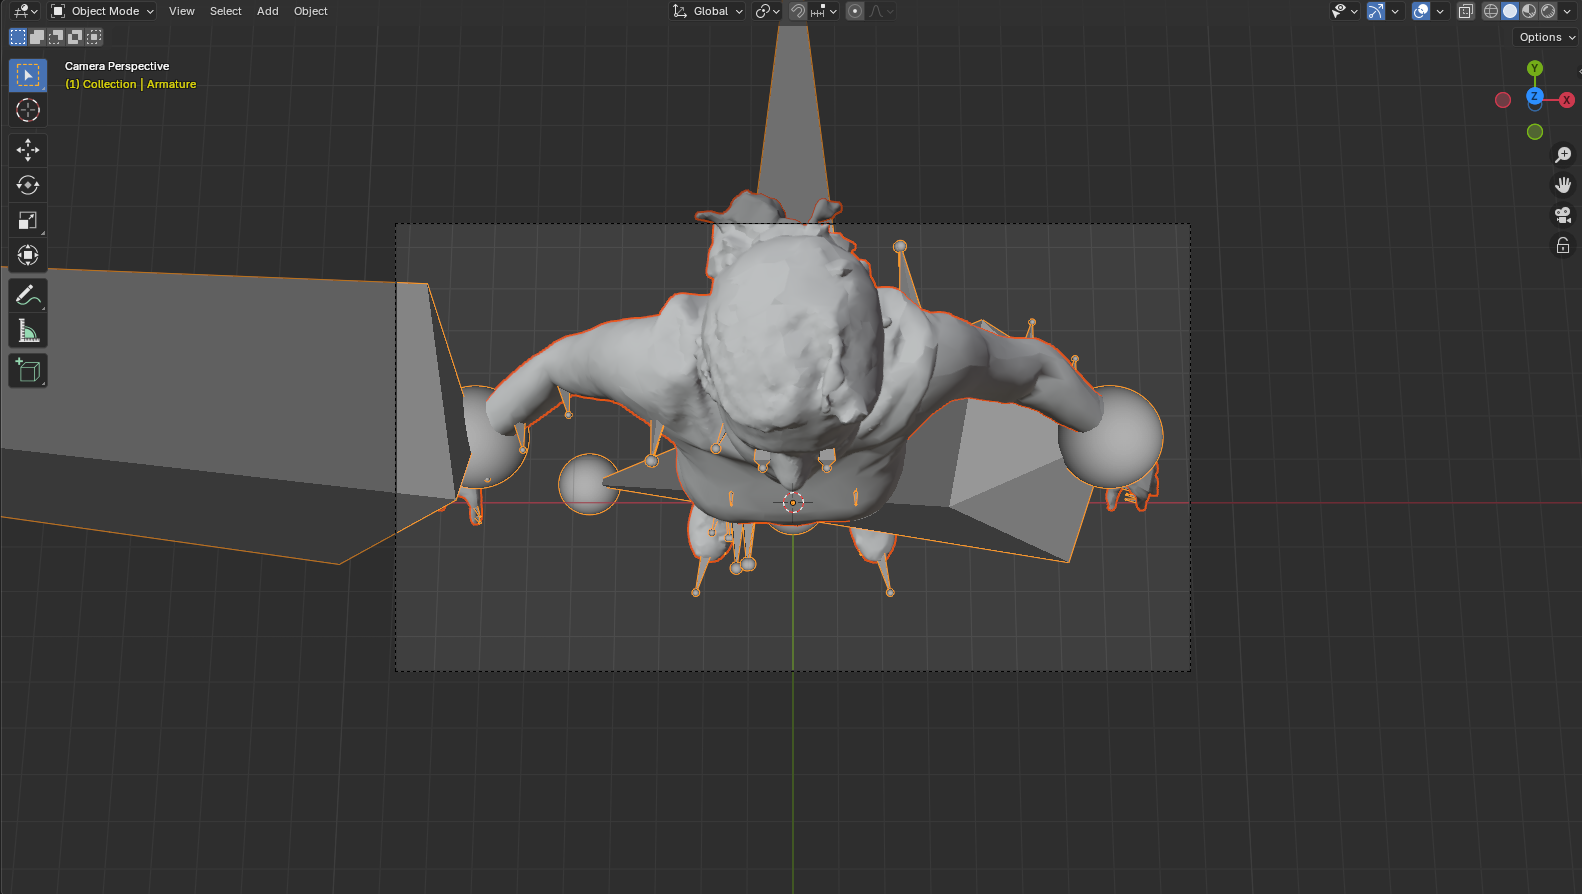

### Second step: Extract 3D coordinates of relevant points
In our case the relevant points are the bones of the mesh so we proceeded to extract global 3D coordinates of all the bones.
In order to extract **global** coordinates we had to multiply the **world transformation matrix** of the armature object by the **local position** of the bone's head in the armature's local coordinate system.

In [ ]:
bone_coordinates_3d = []
if armature.pose:
    for bone in armature.pose.bones:
        bone_global_position = armature.matrix_world @ bone.head
        bone_coordinates_3d.append((bone.name, bone_global_position))

### Third step: Apply perspective projection
Once obtained 3D points, we were able to apply perspective projection:

A 3D point $P=(X,Y,Z,1)$ is trasformed into a 2D point $P'=(x', y', 1)$ using:

$
\begin{bmatrix}
x' \\ y' \\ w
\end{bmatrix}=\begin{bmatrix}
f & 0 & 0 & 0 \\
0 & f & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix} \begin{bmatrix}
X \\ Y \\ Z \\ 1
\end{bmatrix}
$

The resulting $x'$ and $y'$ are normilized dividing them for $w = Z$

$x = \frac{x'}{w}, \ y= \frac{y'}{w}$

In [ ]:
from bpy_extras.object_utils import world_to_camera_view

bone_coordinates_2d = []
scene = bpy.context.scene
for bone_name, coord in bone_coordinates_3d:
    # Convert 3D global coordinates to 2D screen space
    coord_2d = world_to_camera_view(scene, camera, coord)
    bone_coordinates_2d.append((bone_name, coord_2d))

The function `world_to_camera_view` transforms a point in 3D space (in world coordinates) into the normalized 2D screen space of a camera in Blender's 3D environment.
